Import library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns

KNN KLASIFIKASI PADA DATASET DIABETES

In [4]:
#Membaca dataset
diabetes_df = pd.read_csv('K02_diabetes.csv', delimiter= ",")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


Preprocessing: Encode data kategori pada kolom 'gender' dan 'smoking_history'

In [5]:
diabetes_df['gender'] = LabelEncoder().fit_transform(diabetes_df['gender'])
diabetes_df['smoking_history'] = LabelEncoder().fit_transform(diabetes_df['smoking_history'])

Mendefinisikan fitur dan target

In [6]:
X_diabetes = diabetes_df.drop(columns='diabetes')
y_diabetes = diabetes_df['diabetes']

Membagi data menjadi data latih dan data uji


In [7]:
X_train_diabetes, X_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42
)

 Standarisasi fitur


In [10]:
scaler_diabetes = StandardScaler()
X_train_diabetes = scaler_diabetes.fit_transform(X_train_diabetes)
X_test_diabetes = scaler_diabetes.transform(X_test_diabetes)

Melatih model KNN untuk klasifikasi


In [11]:
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train_diabetes, y_train_diabetes)

KNeighborsClassifier()

 Prediksi dan evaluasi model


In [12]:
y_pred_diabetes = knn_classifier.predict(X_test_diabetes)
classification_accuracy = accuracy_score(y_test_diabetes, y_pred_diabetes)
print("Akurasi Klasifikasi KNN (Diabetes):", classification_accuracy)

Akurasi Klasifikasi KNN (Diabetes): 0.9609666666666666


Visualisasi Confusion Matrix

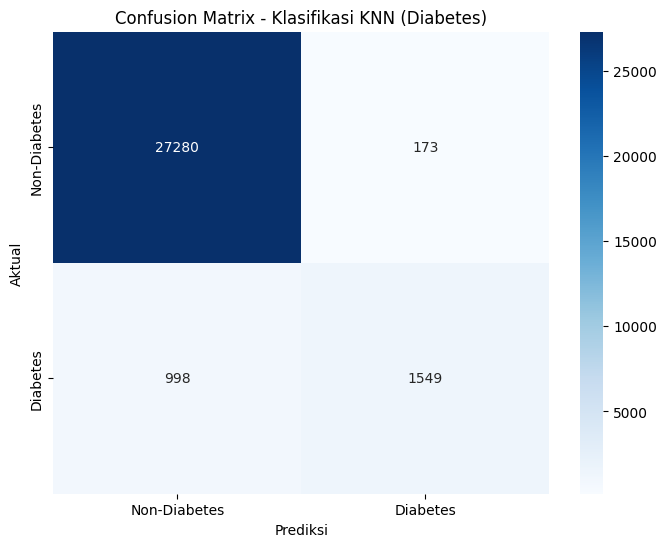

In [13]:
plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test_diabetes, y_pred_diabetes)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Non-Diabetes', 'Diabetes'], yticklabels=['Non-Diabetes', 'Diabetes'])
plt.title('Confusion Matrix - Klasifikasi KNN (Diabetes)')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()

KNN REGRESI PADA DATASET PERFORMA SISWA

In [14]:
students_df = pd.read_csv('R01_students_performance.csv', delimiter= ",")
students_df

,Study Hours (X),Exam Scores (Y)
0,1.5,60
1,2.0,65
2,2.5,73
3,3.0,75
4,2.0,62
5,3.5,85
6,4.0,92
7,3.0,78
8,1.8,63
9,4.5,95


Mendefinisikan fitur dan target

In [15]:
X_students = students_df[['Study Hours (X)']]
y_students = students_df['Exam Scores (Y)']


In [ ]:
Membagi data menjadi data latih dan data uji


In [16]:
X_train_students, X_test_students, y_train_students, y_test_students = train_test_split(
    X_students, y_students, test_size=0.3, random_state=42
)

Standarisasi fitur


In [17]:
scaler_students = StandardScaler()
X_train_students = scaler_students.fit_transform(X_train_students)
X_test_students = scaler_students.transform(X_test_students)

 Melatih model KNN untuk regresi


In [18]:
knn_regressor = KNeighborsRegressor(n_neighbors=5)
knn_regressor.fit(X_train_students, y_train_students)

KNeighborsRegressor()

Prediksi dan evaluasi model


In [19]:
y_pred_students = knn_regressor.predict(X_test_students)
regression_mse = mean_squared_error(y_test_students, y_pred_students)
print("Mean Squared Error KNN Regresi (Performa Siswa):", regression_mse)


Mean Squared Error KNN Regresi (Performa Siswa): 13.693333333333323


Visualisasi Hasil Regresi

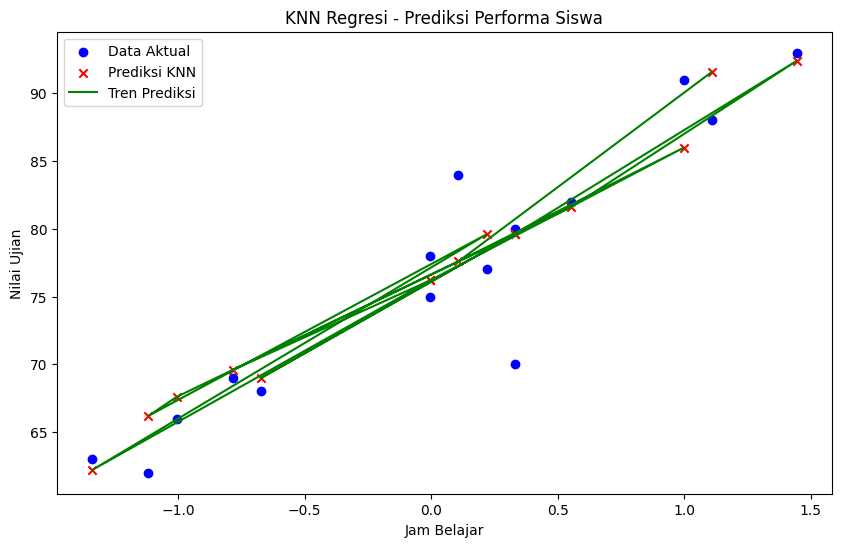

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_students, y_test_students, color="blue", label="Data Aktual")
plt.scatter(X_test_students, y_pred_students, color="red", marker="x", label="Prediksi KNN")
plt.plot(X_test_students, y_pred_students, color="green", label="Tren Prediksi")
plt.title("KNN Regresi - Prediksi Performa Siswa")
plt.xlabel("Jam Belajar")
plt.ylabel("Nilai Ujian")
plt.legend()
plt.show()